In [1]:
# nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import FreqDist


import re
import string
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from gensim.models.doc2vec import Doc2Vec, TaggedDocument


import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import *
from keras.models import *
from keras.layers import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from wordcloud import WordCloud, STOPWORDS 



import nltk
import csv
import sys
import pandas as pd

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv(r"BBC News Train.csv", encoding= 'ISO-8859-1')

In [4]:
df=df.drop(["Unnamed: 3"],axis=1)
df=df.drop(["ArticleId"],axis=1)
print(df.shape)
print(df.head())
print(" ")
df.info()


(1490, 2)
                                                Text       Category
0  worldcom boss  left books alone  former worldc...       business
1  yeading face newcastle in fa cup premiership s...          sport
2  blair prepares to name poll date tony blair is...       politics
3  last star wars  not for children  the sixth an...  entertainment
4  berlin cheers for anti-nazi film a german movi...  entertainment
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      1490 non-null   object
 1   Category  1490 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [5]:
from nltk.corpus import stopwords
import string

stopwords_list = stopwords.words('english')

# add customized stopwords from my dataset
# additional_words = ['“','”','...','``',"''",'’',"httpst",'amp',"theto","}",
#                     "{","rt",".codgy3azxwOY","http:","https:","RT" ,"rt"]

stopwords_list+=string.punctuation

In [6]:
def message_cleaning(message):
  ''' pipeline function performs the follwoing:
  (1) remove punctiation,
  (2) remove stopwords'''


  Test_punc_removed=[char for char in message if char not in string.punctuation]
  Test_punc_removed_join=''.join(Test_punc_removed)
  Test_punc_removed_join_clean=[word for word in Test_punc_removed_join.split() if word.lower() not in stopwords_list ]
  return Test_punc_removed_join_clean
    

In [7]:
df_clean=df['Text'].apply(message_cleaning)
df_clean.head()
print(df_clean.head())

0    [worldcom, boss, left, books, alone, former, w...
1    [yeading, face, newcastle, fa, cup, premiershi...
2    [blair, prepares, name, poll, date, tony, blai...
3    [last, star, wars, children, sixth, final, sta...
4    [berlin, cheers, antinazi, film, german, movie...
Name: Text, dtype: object

0    [worldcom, boss, left, books, alone, former, w...
1    [yeading, face, newcastle, fa, cup, premiershi...
2    [blair, prepares, name, poll, date, tony, blai...
3    [last, star, wars, children, sixth, final, sta...
4    [berlin, cheers, antinazi, film, german, movie...
Name: Text, dtype: object


In [8]:
df_cleaner = [" ".join(x) for x in df_clean]

In [9]:
new_df = pd.DataFrame(df_cleaner, columns=["Text"])
new_df.head()

,Text
0,worldcom boss left books alone former worldcom...
1,yeading face newcastle fa cup premiership side...
2,blair prepares name poll date tony blair likel...
3,last star wars children sixth final star wars ...
4,berlin cheers antinazi film german movie antin...


In [10]:
df["Category"].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [11]:
df["Categoryid"] = df["Category"].factorize()[0]
df.head()

,Text,Category,Categoryid
0,worldcom boss left books alone former worldc...,business,0
1,yeading face newcastle in fa cup premiership s...,sport,1
2,blair prepares to name poll date tony blair is...,politics,2
3,last star wars not for children the sixth an...,entertainment,3
4,berlin cheers for anti-nazi film a german movi...,entertainment,3


In [12]:
category = df[["Category","Categoryid"]]

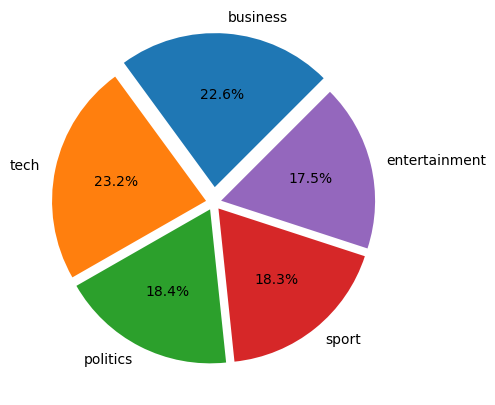

In [13]:
fig = plt.figure(figsize = (5,5))
business = df[df['Categoryid'] == 0 ]
tech = df[df['Categoryid'] == 1 ]
politics = df[df['Categoryid'] == 2]
sport = df[df['Categoryid'] == 3]
entertainment = df[df['Categoryid'] == 4]
count = [business['Categoryid'].count(), tech['Categoryid'].count(), politics['Categoryid'].count(), sport['Categoryid'].count(), entertainment['Categoryid'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",          
              startangle = 45,
              explode = (0.1, 0.05, 0.05, 0.05,0.05))

In [14]:
stop = set(stopwords.words('english'))

business = df[df['Categoryid'] == 0]
business = business['Text']

tech = df[df['Categoryid'] == 1]

tech = tech['Text']

politics = df[df['Categoryid'] == 2]

politics = politics['Text']

sport = df[df['Categoryid'] == 3]

sport = sport['Text']

entertainment = df[df['Categoryid'] == 4]

entertainment = entertainment['Text']

business related words:


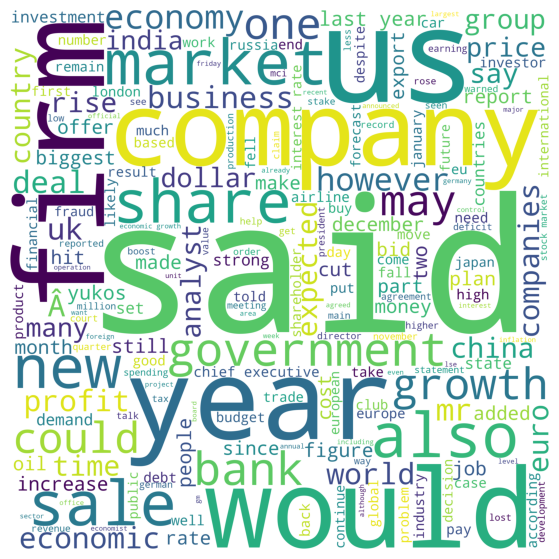

tech related words:


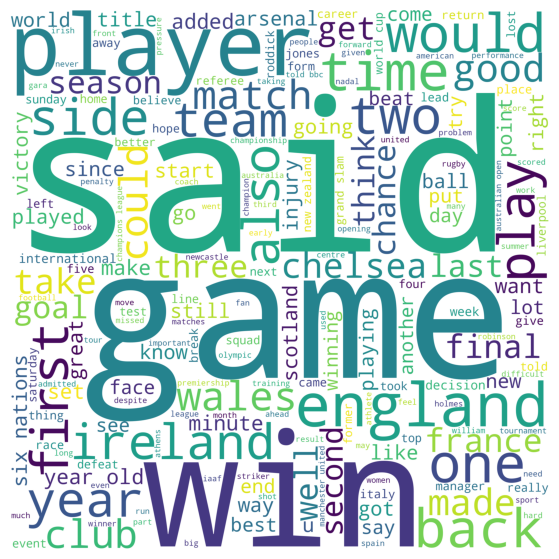

politics related words:


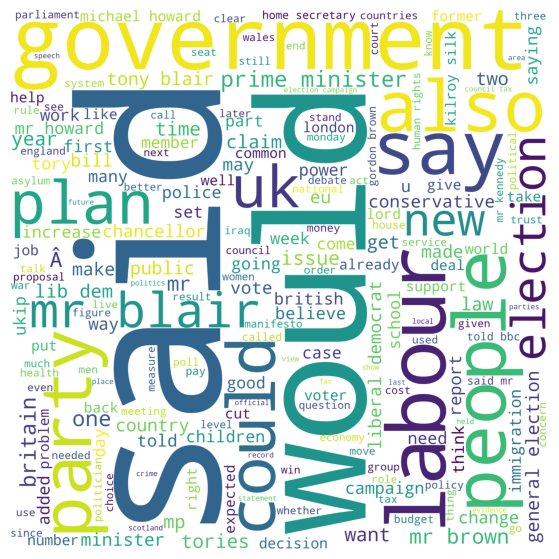

sport related words:


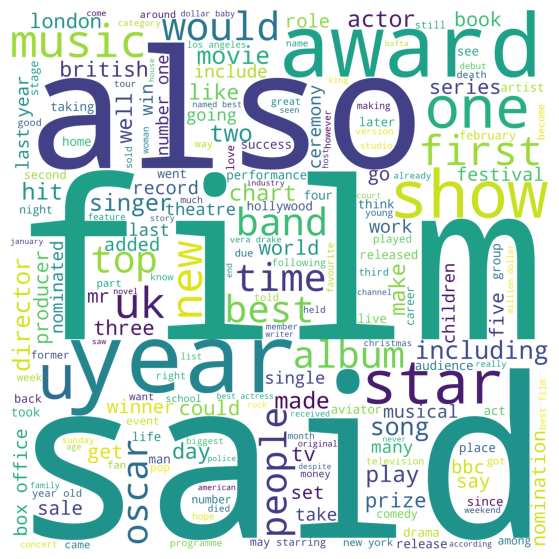

entertainment related words:


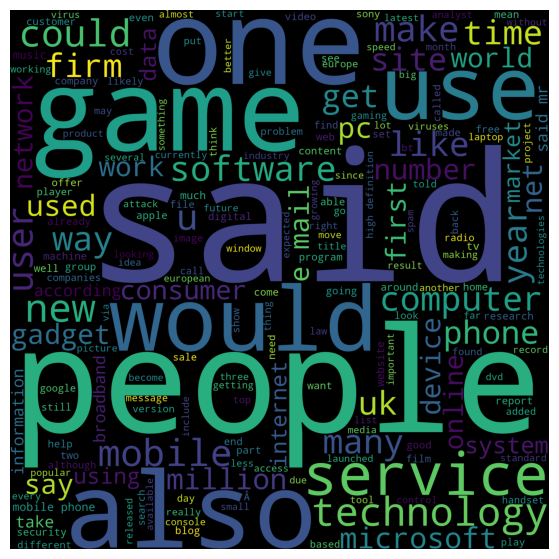

In [15]:
def wordcloud_draw(df, color = 'white'):

    words = ' '.join(df)

    cleaned_word = ' '.join([word for word in words.split() if word not in ('news', 'text')])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    plt.show()

print("business related words:")

wordcloud_draw(business, 'white')

print("tech related words:")

wordcloud_draw(tech, 'white')

print("politics related words:")

wordcloud_draw(politics, 'white')

print("sport related words:")

wordcloud_draw(sport, 'white')

print("entertainment related words:")

wordcloud_draw(entertainment, 'black')

In [16]:
new_df['length']=new_df['Text'].apply(len)
new_df['length']
     

0       1380
1       1809
2       1021
3        843
4       1328
        ... 
1485     715
1486    1379
1487    1274
1488    1147
1489    2819
Name: length, Length: 1490, dtype: int64

In [17]:
new_df['token_length'] = [len(x.split(" ")) for x in new_df.Text]
print(new_df.head())
max(new_df.token_length)

                                                Text  length  token_length
0  worldcom boss left books alone former worldcom...    1380           190
1  yeading face newcastle fa cup premiership side...    1809           265
2  blair prepares name poll date tony blair likel...    1021           152
3  last star wars children sixth final star wars ...     843           130
4  berlin cheers antinazi film german movie antin...    1328           181


1695

In [18]:
new_df["Category"]=df["Category"]

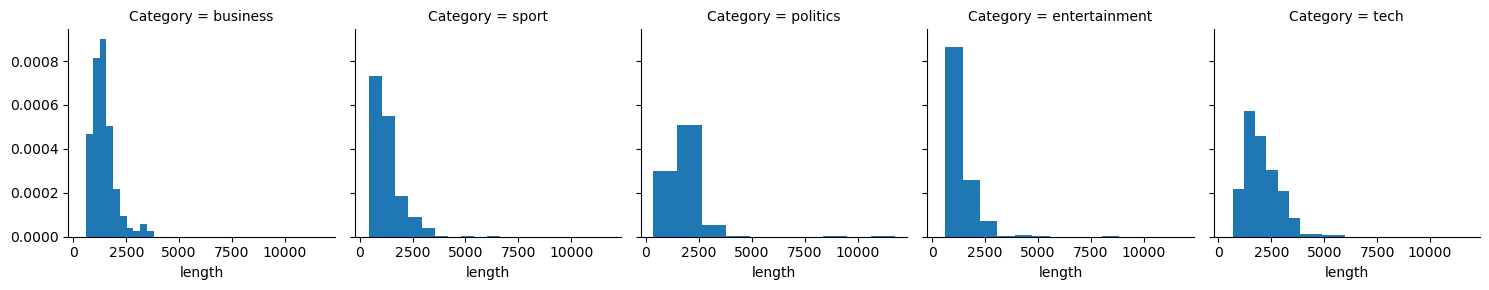

In [19]:
a = sns.FacetGrid(new_df,col='Category')
a.map(plt.hist,'length', density=True)

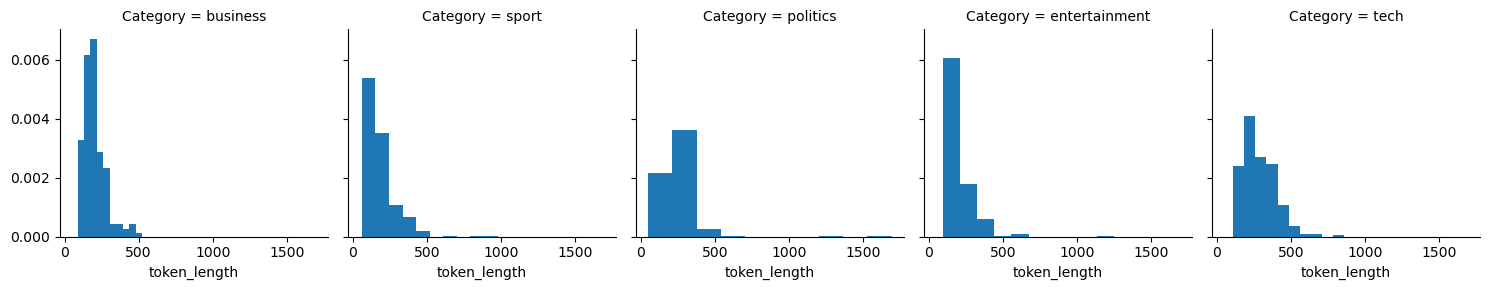

In [20]:
token_l = sns.FacetGrid(new_df,col='Category')
token_l.map(plt.hist,'token_length', density=True)

In [21]:
print(new_df)

                                                   Text  length  token_length  \
0     worldcom boss left books alone former worldcom...    1380           190   
1     yeading face newcastle fa cup premiership side...    1809           265   
2     blair prepares name poll date tony blair likel...    1021           152   
3     last star wars children sixth final star wars ...     843           130   
4     berlin cheers antinazi film german movie antin...    1328           181   
...                                                 ...     ...           ...   
1485  davies favours gloucester future wales hooker ...     715           101   
1486  beijingers fume parking fees choking traffic j...    1379           197   
1487  cars pull us retail figures us retail sales fe...    1274           187   
1488  rem announce new glasgow concert us band rem a...    1147           176   
1489  political squabbles snowball become commonplac...    2819           393   

           Category  
0    

<Axes: ylabel='Frequency'>

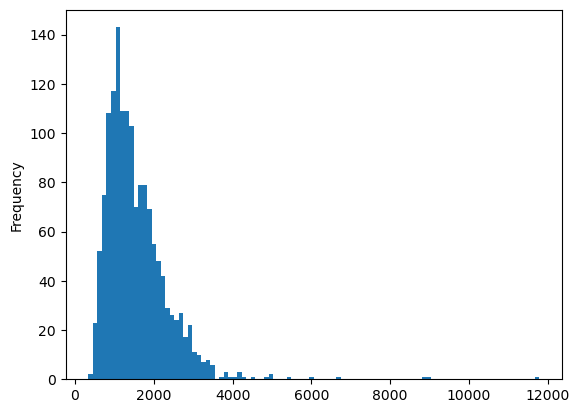

In [22]:
new_df['length'].plot(bins=100,kind='hist')

<Axes: xlabel='Category', ylabel='length'>

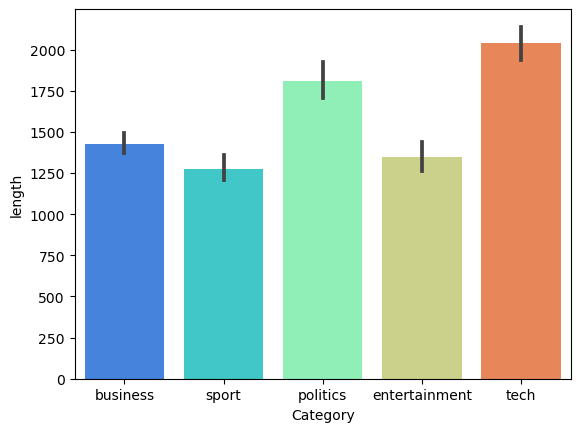

In [23]:
sns.barplot(x='Category',y='length',data=new_df,palette='rainbow')

In [24]:
print('total length of the data is:            {}'.format(new_df.shape[0]))
new_df['Category'].value_counts()

total length of the data is:            1490


Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [25]:
# Top 10 frequent words
df_list = new_df
        
# get most common words in training dataset
import collections
all_words = []
for line in list(new_df['Text']):
  words = line.split()
  for word in words:
    all_words.append(word)

collections.Counter(all_words).most_common(10)
     

[('said', 4838),
 ('mr', 1973),
 ('would', 1711),
 ('also', 1426),
 ('new', 1334),
 ('people', 1322),
 ('us', 1226),
 ('year', 1209),
 ('one', 1158),
 ('could', 1032)]

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Top 25 most common words')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

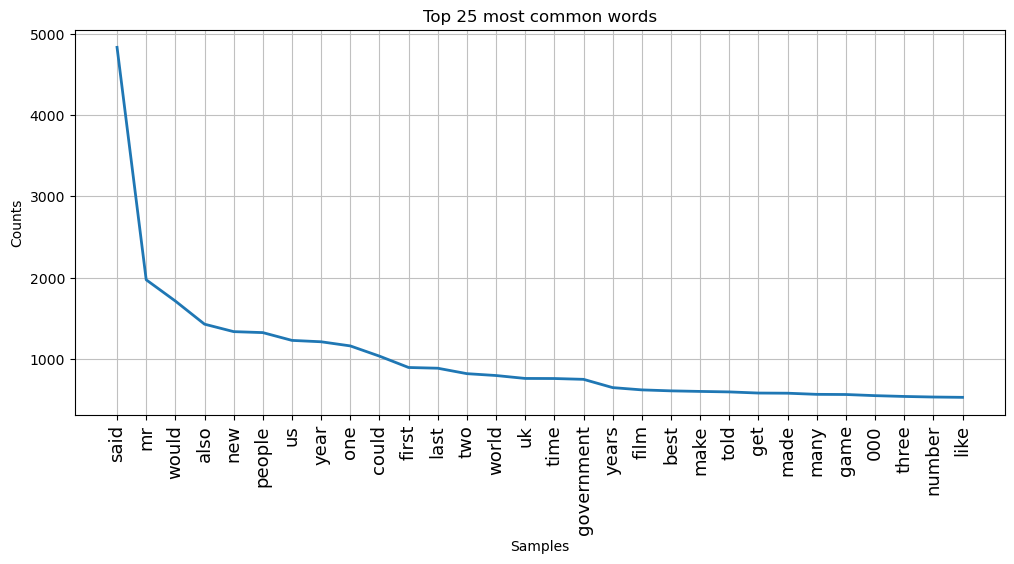

<Axes: title={'center': 'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Freq')

Text(0.5, 0, 'Word Rank')

Text(0.5, 1.0, 'log-log plot of words frequency')

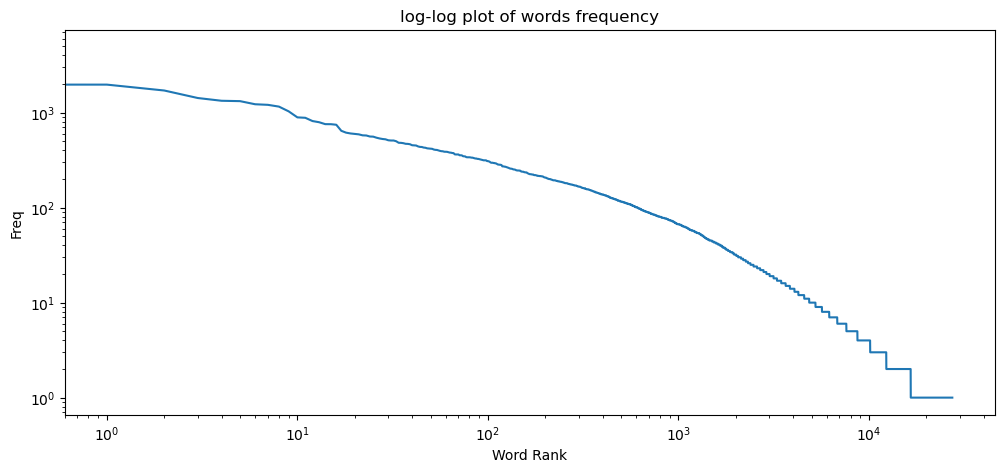

In [26]:
from collections import Counter

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(30,cumulative=False)

word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))

plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

In [27]:
le = LabelEncoder()

le.fit(df['Category'])

df['target'] = le.transform(df['Category'])
df.head(10)

LabelEncoder()

,Text,Category,Categoryid,target
0,worldcom boss left books alone former worldc...,business,0,0
1,yeading face newcastle in fa cup premiership s...,sport,1,3
2,blair prepares to name poll date tony blair is...,politics,2,2
3,last star wars not for children the sixth an...,entertainment,3,1
4,berlin cheers for anti-nazi film a german movi...,entertainment,3,1
5,hague given up his pm ambition former conser...,politics,2,2
6,moya emotional after davis cup win carlos moya...,sport,1,3
7,s korean credit card firm rescued south korea ...,business,0,0
8,connors boost for british tennis former world ...,sport,1,3
9,japanese banking battle at an end japan s sumi...,business,0,0


In [28]:
from sklearn.model_selection import train_test_split

X = df['Text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=0.25,
                                                    random_state=500,shuffle=True)


In [29]:
y_test.value_counts()

target
3    87
0    84
2    69
1    68
4    65
Name: count, dtype: int64

In [30]:
y_train.value_counts()

target
3    259
0    252
1    205
2    205
4    196
Name: count, dtype: int64

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from nltk import TweetTokenizer
from sklearn.metrics import precision_score, recall_score, f1_score

tokenizer = TweetTokenizer(preserve_case=False)

In [32]:
linear_svc = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                        tokenizer=tokenizer.tokenize)),('clf', LinearSVC(class_weight='balanced'))])

linear_svc.fit(X_train, y_train)

C:\Users\meera\miniconda3\envs\ran\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\meera\miniconda3\envs\ran\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000012598D5D9F0>>)),
                ('clf', LinearSVC(class_weight='balanced'))])

In [33]:
# prediction
y_hat_train=linear_svc.predict(X_train)
y_hat_test = linear_svc.predict(X_test)

from sklearn import metrics
import itertools  


svc_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
svc_test_acc


0.98

In [34]:
from sklearn.naive_bayes import MultinomialNB
text_mnb = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                               tokenizer=tokenizer.tokenize)),
                     ('clf', MultinomialNB())])


text_mnb.fit(X_train, y_train)


y_hat_train=text_mnb.predict(X_train)
y_hat_test = text_mnb.predict(X_test)

mnb_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
mnb_test_acc

C:\Users\meera\miniconda3\envs\ran\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000012598D5D9F0>>)),
                ('clf', MultinomialNB())])

0.97

In [35]:
from sklearn.naive_bayes import MultinomialNB
text_mnb = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                               tokenizer=tokenizer.tokenize)),
                     ('clf', MultinomialNB())])

text_mnb.fit(X_train, y_train)

y_hat_train=text_mnb.predict(X_train)
y_hat_test = text_mnb.predict(X_test)


mnb_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
mnb_test_acc

C:\Users\meera\miniconda3\envs\ran\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000012598D5D9F0>>)),
                ('clf', MultinomialNB())])

0.97

In [36]:
from sklearn.naive_bayes import MultinomialNB
text_mnb = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                               tokenizer=tokenizer.tokenize)),
                     ('clf', MultinomialNB())])

text_mnb.fit(X_train, y_train)

y_hat_train=text_mnb.predict(X_train)
y_hat_test = text_mnb.predict(X_test)


mnb_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
mnb_test_acc

C:\Users\meera\miniconda3\envs\ran\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000012598D5D9F0>>)),
                ('clf', MultinomialNB())])

0.97

In [37]:
from sklearn.ensemble import RandomForestClassifier
text_rfc = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                               tokenizer=tokenizer.tokenize)),
                     ('clf', RandomForestClassifier(class_weight='balanced'))])

text_rfc.fit(X_train, y_train)



y_hat_train=text_rfc.predict(X_train)
y_hat_test = text_rfc.predict(X_test)

rf_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
rf_test_acc

C:\Users\meera\miniconda3\envs\ran\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000012598D5D9F0>>)),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

0.96

In [38]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import  SMOTE
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                            tokenizer=tokenizer.tokenize)

rfc = RandomForestClassifier(class_weight='balanced')

SMOTE_pipeline = make_pipeline(tfidf, SMOTE(random_state=123),rfc)
SMOTE_pipeline.fit(X_train, y_train)

y_hat_train=SMOTE_pipeline.predict(X_train)
y_hat_test = SMOTE_pipeline.predict(X_test)

smote_rf_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
smote_rf_test_acc 

C:\Users\meera\miniconda3\envs\ran\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000012598D5D9F0>>)),
                ('smote', SMOTE(random_state=123)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced'))])

0.96

In [39]:
import nltk
nltk.download('punkt')

new_df['tokens'] =new_df['Text'].map(lambda x: word_tokenize(x))    

#for token in new_df['tokens']:
    #print(token)
new_df["target"]=df["target"]
new_df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\meera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

,Text,length,token_length,Category,tokens,target
0,worldcom boss left books alone former worldcom...,1380,190,business,"[worldcom, boss, left, books, alone, former, w...",0
1,yeading face newcastle fa cup premiership side...,1809,265,sport,"[yeading, face, newcastle, fa, cup, premiershi...",3
2,blair prepares name poll date tony blair likel...,1021,152,politics,"[blair, prepares, name, poll, date, tony, blai...",2
3,last star wars children sixth final star wars ...,843,130,entertainment,"[last, star, wars, children, sixth, final, sta...",1
4,berlin cheers antinazi film german movie antin...,1328,181,entertainment,"[berlin, cheers, antinazi, film, german, movie...",1


In [40]:

tweet_tokens = list(new_df['tokens'])

     


tagged_data = [
    TaggedDocument(
        words=tweet, tags=[str(i)])for i, tweet in enumerate(tweet_tokens)
]


model = Doc2Vec(vector_size=100, dm=1, epochs=100)

model.build_vocab(tagged_data)
     


model.train(tagged_data, total_examples=model.corpus_count,
            epochs=model.epochs)
     


tweet_vecs = []
for tweet in new_df.tokens:
    vec = model.infer_vector(tweet)
    tweet_vecs.append(vec)

tweet_vecs = np.array(tweet_vecs)
     


y = new_df.target
X = tweet_vecs

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42,shuffle=True)

In [42]:
X_train

array([[-2.4943185 ,  2.5421386 ,  1.4155611 , ..., -0.7155725 ,
         0.4645908 ,  0.72422254],
       [-0.95506334,  1.885138  ,  2.9294412 , ..., -0.18485738,
         0.04934195,  1.6209055 ],
       [-2.6898696 ,  0.8680674 ,  1.256038  , ...,  1.9193838 ,
        -0.14598094, -1.6093575 ],
       ...,
       [ 2.3436856 , -0.5453698 ,  0.27295667, ..., -4.4232135 ,
        -0.63161445, -0.7056289 ],
       [-1.1203269 ,  1.3083894 , -3.0079505 , ...,  1.2069178 ,
         1.6618336 ,  2.0885096 ],
       [ 2.422094  , -3.574229  ,  0.07649118, ..., -0.770717  ,
         1.114818  , -3.2023554 ]], dtype=float32)

In [43]:
def evaluate_clf(y_true, y_pred):
    """Return confusion matrix, classification report, and accuracy score
    for a classifier.
    
    Parameters
    ----------
    y_true : array-like
        Target class labels
    y_pred : array-like
        Predicted class labels
        
    Returns
    ----------
    Confusion matrix, classification report, accuracy score
    """
    
    test_acc = round(accuracy_score(y_true, y_pred), 2)
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('---'*20)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('---'*20)
    print('Test Accuracy:')
    print(test_acc)

In [44]:

svm_d2v = LinearSVC()
svm_d2v.fit(X_train, y_train)
y_hat_test = svm_d2v.predict(X_test)



results=evaluate_clf(y_test, y_hat_test)
svm_d2v_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

C:\Users\meera\miniconda3\envs\ran\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\meera\miniconda3\envs\ran\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

Confusion Matrix:
[[72  4  1  0  2]
 [ 0 72  1  2  1]
 [ 3  1 55  1  0]
 [ 0  1  0 94  0]
 [ 0  3  0  4 56]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94        79
           1       0.89      0.95      0.92        76
           2       0.96      0.92      0.94        60
           3       0.93      0.99      0.96        95
           4       0.95      0.89      0.92        63

    accuracy                           0.94       373
   macro avg       0.94      0.93      0.93       373
weighted avg       0.94      0.94      0.94       373

------------------------------------------------------------
Test Accuracy:
0.94


In [45]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y) 
print(pd.Series(y_resampled).value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

svm_d2v_smote = LinearSVC()
svm_d2v_smote.fit(X_train, y_train)
y_hat_test = svm_d2v_smote.predict(X_test)



results=evaluate_clf(y_test, y_hat_test)
svm_sd2v_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

target
0    346
3    346
2    346
1    346
4    346
Name: count, dtype: int64


C:\Users\meera\miniconda3\envs\ran\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\meera\miniconda3\envs\ran\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

Confusion Matrix:
[[89  1  2  0  4]
 [ 3 68  5  1  2]
 [ 4  0 81  1  0]
 [ 1  0  0 77  0]
 [ 1  3  0  0 90]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        96
           1       0.94      0.86      0.90        79
           2       0.92      0.94      0.93        86
           3       0.97      0.99      0.98        78
           4       0.94      0.96      0.95        94

    accuracy                           0.94       433
   macro avg       0.94      0.93      0.94       433
weighted avg       0.94      0.94      0.94       433

------------------------------------------------------------
Test Accuracy:
0.94


In [46]:
rf_d2v_smote = RandomForestClassifier(random_state=1)
rf_d2v_smote.fit(X_train, y_train)
y_hat_test = rf_d2v_smote.predict(X_test)

results=evaluate_clf(y_test, y_hat_test)
rf_sd2v_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

RandomForestClassifier(random_state=1)

Confusion Matrix:
[[86  2  2  1  5]
 [ 3 70  3  1  2]
 [ 3  0 81  2  0]
 [ 1  0  1 76  0]
 [ 1  6  1  1 85]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        96
           1       0.90      0.89      0.89        79
           2       0.92      0.94      0.93        86
           3       0.94      0.97      0.96        78
           4       0.92      0.90      0.91        94

    accuracy                           0.92       433
   macro avg       0.92      0.92      0.92       433
weighted avg       0.92      0.92      0.92       433

------------------------------------------------------------
Test Accuracy:
0.92


In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {
     'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,20],
    'min_samples_split':[5,20,50],
    'min_samples_leaf':[15,20,30],
    'n_estimators': [1,5,10]
}
gs = GridSearchCV(rf_d2v_smote, param_grid, cv=3, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_params_

rf_d2v_smote_tuned = RandomForestClassifier(n_estimators=10,
                                criterion= 'entropy',
                                max_depth= 20,
                                min_samples_leaf= 15,
                                min_samples_split= 5)

rf_d2v_smote_tuned.fit(X_train, y_train)


y_hat_test = rf_d2v_smote_tuned.predict(X_test)


results=evaluate_clf(y_test, y_hat_test)
rf_d2v_tuned_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 20],
                         'min_samples_leaf': [15, 20, 30],
                         'min_samples_split': [5, 20, 50],
                         'n_estimators': [1, 5, 10]})

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 15,
 'min_samples_split': 50,
 'n_estimators': 10}

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=15,
                       min_samples_split=5, n_estimators=10)

Confusion Matrix:
[[58  7 11 10 10]
 [ 1 67  5  4  2]
 [ 7  4 68  4  3]
 [ 4  4  7 62  1]
 [ 4  9  4  0 77]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.60      0.68        96
           1       0.74      0.85      0.79        79
           2       0.72      0.79      0.75        86
           3       0.78      0.79      0.78        78
           4       0.83      0.82      0.82        94

    accuracy                           0.77       433
   macro avg       0.77      0.77      0.77       433
weighted avg       0.77      0.77      0.76       433

------------------------------------------------------------
Test Accuracy:
0.77


In [48]:

scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
      

mnb_sd2v_clf = MultinomialNB()
mnb_sd2v_clf.fit(X_train_sc, y_train)
y_hat_test = mnb_sd2v_clf.predict(X_test_sc)
     
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


evaluate_clf(y_test, y_hat_test)
mnb_sd2v_test_acc = round(accuracy_score(y_test,y_hat_test), 2)

MultinomialNB()

MultinomialNB()

Confusion Matrix:
[[87  4  3  0  2]
 [ 0 75  3  1  0]
 [ 3  1 80  2  0]
 [ 0  0  0 78  0]
 [ 0  6  3  1 84]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        96
           1       0.87      0.95      0.91        79
           2       0.90      0.93      0.91        86
           3       0.95      1.00      0.97        78
           4       0.98      0.89      0.93        94

    accuracy                           0.93       433
   macro avg       0.93      0.94      0.93       433
weighted avg       0.94      0.93      0.93       433

------------------------------------------------------------
Test Accuracy:
0.93
